In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load datasets
df =pd.read_csv('C:/Users/Dell/OneDrive/Desktop/intership project/Youtube_Analysis/youtube_channel_real_performance_analytics.csv')

In [4]:
df.head(20)

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62
5,5,496.0,2016-07-08 00:00:00,7,8,7,2016,Friday,0.036,491.0,...,0.0,0.0,36.70,182.0,8415.0,425.4773,19.0,0.305,40395.0,5.09
6,6,9.0,2016-08-05 00:00:00,28,5,8,2016,Friday,0.001,32.0,...,0.0,0.0,117.30,10.0,4330.0,12.6979,4.0,0.003,34250.0,4.67
7,7,34.0,2016-08-08 00:00:00,3,8,8,2016,Monday,0.015,404.0,...,0.0,0.0,101.52,35.0,10048.0,98.9192,24.0,0.152,39866.0,7.31
8,8,11.0,2016-08-11 00:00:00,3,11,8,2016,Thursday,0.006,127.0,...,0.0,0.0,75.52,8.0,8188.0,18.8953,14.0,0.051,37186.0,6.83
9,9,14.0,2016-08-12 00:00:00,1,12,8,2016,Friday,0.014,44.0,...,0.0,0.0,91.03,13.0,4389.0,16.6470,5.0,0.063,33920.0,4.36


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

In [6]:
df.isnull().sum()

ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64

In [7]:
 # Convert 'Video Publish Time' to datetime format
df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'])

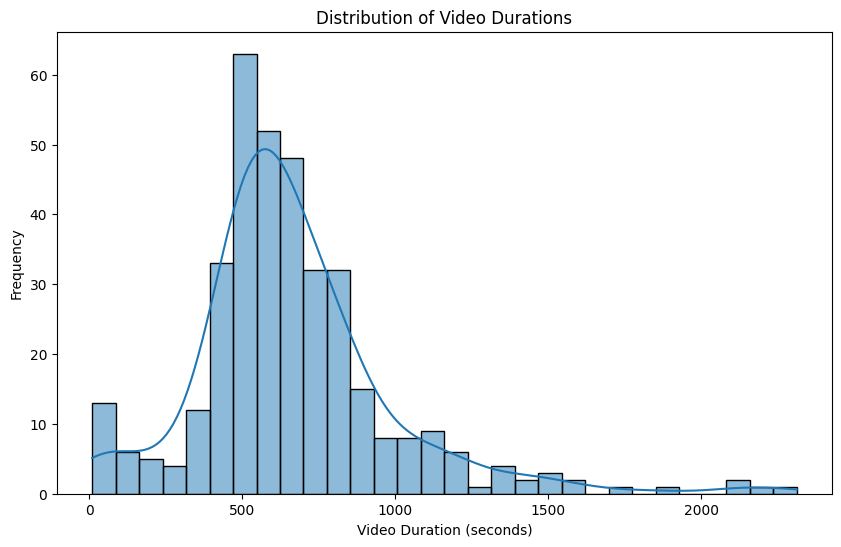

In [11]:
# EDA
# Distribution of the video Duration
plt.figure(figsize=(10,6))
sns.histplot(df['Video Duration'], bins=30, kde=True)
plt.title('Distribution of Video Durations')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

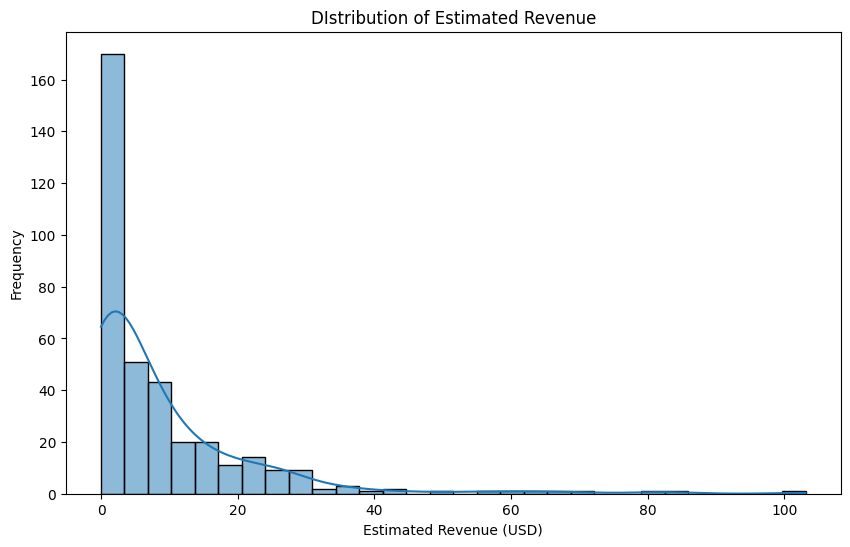

In [12]:
#revenue distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Estimated Revenue (USD)'],bins =30, kde=True)
plt.title('DIstribution of Estimated Revenue')
plt.xlabel('Estimated Revenue (USD)')
plt.ylabel('Frequency')
plt.show()

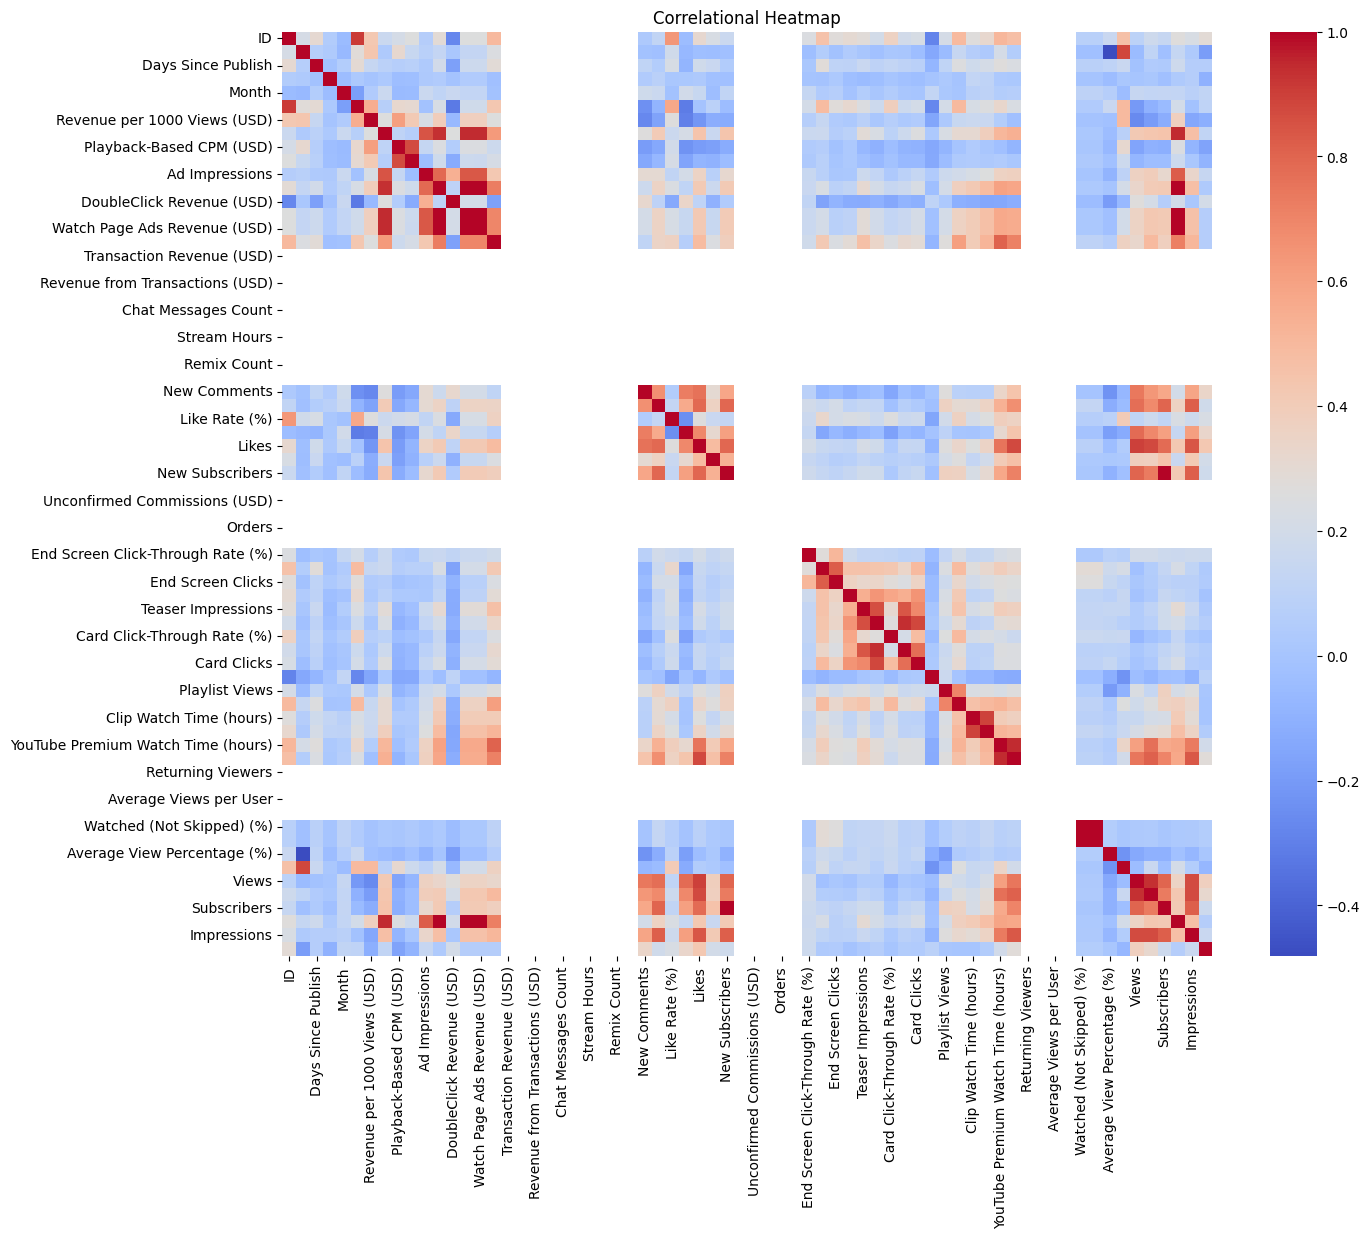

In [13]:
#select Only numeric columns
numeric_df =df.select_dtypes(include =[np.number])
#compute the correlations matrix
corr =numeric_df.corr()
#plot the heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr, cmap='coolwarm',annot=False,fmt ='2f')
plt.title('Correlational Heatmap')
plt.show()

In [23]:
#predictive modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#define features and target variables
# Define features
X = df[['Views', 'Subscribers', 'Likes', 'Shares', 'New Comments']]
X['Engagement Rate'] = (X['Likes'] + X['Shares'] + X['New Comments']) / X['Views'] * 100

# Target variable
y = df['Estimated Revenue (USD)']


#split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# model.fit(X_train,y_train)

#intilise and train the model
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

#model prediction
y_pred =model.predict(X_test)
#calculate the prediction accuracy
mse =mean_squared_error(y_test,y_pred)
rmse =np.sqrt(mse)
rmse

np.float64(8.700635795020329)

In [25]:
import joblib
joblib.dump(model,'youtube_revenue_predictor.pkl')

['youtube_revenue_predictor.pkl']